<a href="https://colab.research.google.com/github/smwalter96/map_tweets/blob/main/Daily_Data/ImpeachmentDay_1_14_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install geopy
!pip install folium
!pip install geopandas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener 
from tweepy import OAuthHandler
import csv
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from random import sample
import numpy as np
from shapely.geometry import Point
import geopandas as gp
import matplotlib.pyplot as plt

In [6]:
# Set tweepy keys and email
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""
email = ""

In [5]:
# Authorize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [7]:
# Set hashtags to search
tag = "ImpeachmentDay"

In [8]:
# Search tweets with a given hashtag
# Return user location
df = pd.DataFrame()
for tweet in tweepy.Cursor(api.search,q=tag,count=100,
                           lang="en",
                           since="2021-01-13").items():    
    #print (tweet.user.location)
    df = df.append({'user_location': tweet.user.location, 'text': tweet.text},ignore_index=True)
    

In [9]:
df

,text,tweet_location,user_location
0,#ImpeachmentDay #Impeachment2 \nSo do we use t...,None,United States
1,"#ImpeachmentDay NOW, I feel I can heal! NOW, ...",None,
2,RT @DeanObeidallah: Only 10 Republicans in the...,None,"Raleigh, NC"
3,BREAKING: Trump impeached twice. 10 republican...,None,Kenya
4,RT @Reina_li105: “I have the most impeachments...,None,"Stockholm, Sverige"
...,...,...,...
134525,RT @zoomarang: #Maddow Imma be ready for #Impe...,None,"Missouri, USA"
134526,#Maddow Imma be ready for #ImpeachmentDay tomo...,None,TEXAS
134527,Tomorrow Is #impeachmentday,None,"birchwood, TN"
134528,@BeschlossDC He said he won't #invokethe25th! ...,None,"Michigan, USA"


In [10]:
df1 = df

# Set columns to map
df1 = df[['text', 'user_location']]

# Drop rows with no user location
df1['user_location'].replace('', np.nan, inplace=True)
df1.dropna(inplace=True)
df1

,text,user_location
0,#ImpeachmentDay #Impeachment2 \nSo do we use t...,United States
2,RT @DeanObeidallah: Only 10 Republicans in the...,"Raleigh, NC"
3,BREAKING: Trump impeached twice. 10 republican...,Kenya
4,RT @Reina_li105: “I have the most impeachments...,"Stockholm, Sverige"
5,RT @red4_13: Donald got more impeachments than...,"Seattle, WA"
...,...,...
134525,RT @zoomarang: #Maddow Imma be ready for #Impe...,"Missouri, USA"
134526,#Maddow Imma be ready for #ImpeachmentDay tomo...,TEXAS
134527,Tomorrow Is #impeachmentday,"birchwood, TN"
134528,@BeschlossDC He said he won't #invokethe25th! ...,"Michigan, USA"


In [11]:
df1 = df1.loc[np.random.choice(df1.index, size=1000)]
df1

,text,user_location
81126,RT @taradublinrocks: Every time a #Trumpocrite...,"Jonesboro, Arkansas"
88937,RT @BlackCatUnloads: Those who continue to ena...,"Tennessee, USA"
35657,"RT @NavySailorBMC: Fun fact, when you’re weari...","Paris, France"
95931,RT @ResistMeena: The last time troops quartere...,Canada
3889,RT @murray_nyc: History made: Donald Trump has...,Yekaterina
...,...,...
15238,RT @thebr0keb0i: Republicans like Steve Scalis...,"Baltimore, MD"
20073,Imagine being such a shitty President you get ...,New York
71130,Why have they NOT expelled Lauren Boebert yet?...,Reality
103235,RT @Strandjunker: 0 Friends\n0 Dogs\n1 Terrori...,"Haren (NB), Nederland"


In [12]:
# Set geolocator from geopy
geolocator = Nominatim(timeout=10, user_agent = email)

In [13]:
# Apply geocoder with ratelimit
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# Run geocoder on dataframe and return latitude and longitude
df1['location'] = df1['user_location'].apply(geocode)
df1['Lat'] = df1['location'].apply(lambda x: x.latitude if x else None)
df1['Lon'] = df1['location'].apply(lambda x: x.longitude if x else None)

df1.dropna(inplace=True)
df1.head()

,text,user_location,location,Lat,Lon
81126,RT @taradublinrocks: Every time a #Trumpocrite...,"Jonesboro, Arkansas","(Jonesboro, Craighead County, Arkansas, United...",35.842865,-90.703452
88937,RT @BlackCatUnloads: Those who continue to ena...,"Tennessee, USA","(Tennessee, United States, (35.7730076, -86.28...",35.773008,-86.282008
35657,"RT @NavySailorBMC: Fun fact, when you’re weari...","Paris, France","(Paris, Île-de-France, France métropolitaine, ...",48.856697,2.351462
95931,RT @ResistMeena: The last time troops quartere...,Canada,"(Canada, (61.0666922, -107.9917071))",61.066692,-107.991707
9590,RT @grantstern: It's official: \n\nPresident T...,"Chicago, IL","(Chicago, Cook County, Illinois, United States...",41.875562,-87.624421


In [14]:
# Export data as csv
from google.colab import files
df1.to_csv('ImpeachmentDay_1_13.csv') 
files.download('ImpeachmentDay_1_13.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

User Locations using Hashtag ImpeachmentDay


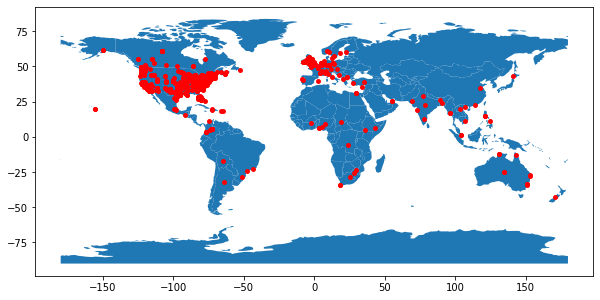

In [15]:
# Map user location
geometry = [Point(xy) for xy in zip(df1['Lon'], df1['Lat'])]
gdf = gp.GeoDataFrame(df1, geometry=geometry)   

title_text = ('User Locations using Hashtag ' + tag)

print(title_text)
plt.show()
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


In [16]:
# Plot interactive user locations with tweet text in popups
print()

map1 = folium.Map()
for index,row in df1.iterrows(): 
  popup = folium.Popup(row['text'],
                     max_width=500)
  folium.Marker(location=(row['Lat'],row['Lon']), popup=popup).add_to(map1)

display(map1)